# Linear Regression in Statsmodels

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline

In [2]:
## load data
fpath= 'Data/CarPrice_Assignment.csv'
df = pd.read_csv(fpath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
#Run summary statistics of numeric columns
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
#Run summary stats of categorical columns
df.describe(exclude = 'number')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [5]:
#Drop car name and car_ID for high cardinality
df = df.drop(columns = ['CarName', 'car_ID'])
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#Define X and y
y = df['price']
X = df.drop(columns = 'price')

In [7]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
90,1,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,four,103,idi,2.99,3.47,21.9,55,4800,45,50
173,-1,gas,std,four,sedan,fwd,front,102.4,175.6,66.5,...,four,122,mpfi,3.31,3.54,8.7,92,4200,29,34
93,1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
167,2,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,...,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30


In [8]:
#Make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [9]:
#Make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [10]:
#Make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse_output=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

In [11]:
#Fit the column transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['fueltype', 'aspiration', 'doornumber',
                                  'carbody', 'drivewheel', 'enginelocation',
                                  'enginetype', 'cylindernumber',
                                  'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['symboling', 'wheelbase', 'carlength',
                                  'carwidth', 'carheight', 'curbweight',
                                  'enginesize', 'boreratio', 'stroke',
                                  'compressionratio', 'horsepower', 'peakrpm',
                                  'citympg', 'highwaympg'])])

In [12]:
#Create the empty list
final_features = []

In [13]:
## B) Using list-slicing to find the encoder 
ohe_step = preprocessor.named_transformers_['pipeline-1'][-1]

In [14]:
## Now, get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype=object)

In [15]:
## Add the categorical feature names to our final_features list
final_features.extend(cat_features)
final_features

['fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginelocation_rear',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

In [16]:
## adding the numeric features which were passed through the model
final_features.extend(num_cols)
final_features

['fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginelocation_rear',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [17]:
#Transform training data
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0
173,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0
93,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
167,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0


In [18]:
#Transform testing data
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,55.7,3230.0,209.0,3.62,3.39,8.00,182.0,5400.0,16.0,22.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,52.0,3053.0,131.0,3.13,3.40,7.00,160.0,5500.0,16.0,22.0
100,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.7,2302.0,120.0,3.33,3.47,8.50,97.0,5200.0,27.0,34.0
132,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,56.1,2658.0,121.0,3.54,3.07,9.31,110.0,5250.0,21.0,28.0
68,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,58.7,3750.0,183.0,3.58,3.64,21.50,123.0,4350.0,22.0,25.0


In [19]:
## Standard Statsmodels import
import statsmodels.api as sm

In [20]:
#Overwrite df's with constant
X_train_df = sm.add_constant(X_train_df,has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df,has_constant='add', prepend=False)
display(X_train_df.head(2), X_test_df.head(2))

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0,1.0
173,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0,1.0


,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,1.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,1.0


In [21]:
#Make & fit a statmsodels OLS
model = sm.OLS(y_train,X_train_df, hasconst=True)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     55.20
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.78e-57
Time:                        13:51:49   Log-Likelihood:                -1360.4
No. Observations:                 153   AIC:                             2801.
Df Residuals:                     113   BIC:                             2922.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fueltype_diesel       -2754.0108   3061.925     -0.899      0.370   -8820.237    3312.215
fueltype_gas          -6762.3873   3036.682     -2.227      0.028   -1.28e+04    -746.173
aspiration_std        -5830.9890   2041.671     -2.856      0.005   -9875.907   -1786.071
aspiration_turbo      -3685.4091   1914.199     -1.925      0.057   -7477.782     106.964
doornumber_four       -4661.2975   1993.045     -2.339      0.021   -8609.880    -712.715
doornumber_two        -4855.1005   1909.915     -2.542      0.012   -8638.988   -1071.214
carbody_convertible     391.1172   1061.363      0.369      0.713   -1711.634    2493.869
carbody_hardtop       -3386.3942   1316.419     -2.572      0.011   -5994.457    -778.331
carbody_hatchback     -2189.8314    996.073     -2.198      0.030   -4163.232    -216.431
carbody_sedan         -1341.0731   1010.567     -1.327      0.187   -3343.190     661.043
carbody_wagon         -2990.2165   1173.725     -2.548      0.012   -5315.577    -664.856
drivewheel_4wd        -3033.9503   1434.421     -2.115      0.037   -5875.797    -192.104
drivewheel_fwd        -3589.9257   1541.345     -2.329      0.022   -6643.609    -536.242
drivewheel_rwd        -2892.5221   1476.047     -1.960      0.053   -5816.837      31.793
enginelocation_front  -9870.6333   2400.932     -4.111      0.000   -1.46e+04   -5113.954
enginelocation_rear     354.2353   2484.564      0.143      0.887   -4568.134    5276.604
enginetype_dohc        -267.6125   1201.258     -0.223      0.824   -2647.522    2112.297
enginetype_dohcv      -6841.5974   4325.556     -1.582      0.117   -1.54e+04    1728.109
enginetype_l          -1209.6804   2051.071     -0.590      0.557   -5273.222    2853.861
enginetype_ohc         1988.0034   1255.997      1.583      0.116    -500.352    4476.359
enginetype_ohcf        -284.2699   1740.709     -0.163      0.871   -3732.929    3164.389
enginetype_ohcv       -5304.6838   1245.289     -4.260      0.000   -7771.825   -2837.542
enginetype_rotor       2403.4425   1519.008      1.582      0.116    -605.986    5412.871
cylindernumber_eight   5132.6433   2153.981      2.383      0.019     865.218    9400.069
cylindernumber_five   -2912.4014   1934.432     -1.506      0.135   -6744.861     920.058
cylindernumber_four   -3951.9226   1889.604     -2.091      0.039   -7695.568    -208.277
cylindernumber_six    -2098.7982   1007.476     -2.083      0.039   -4094.789    -102.808
cylindernumber_twelve -8089.3617   4412.912     -1.833      0.069   -1.68e+04     653.413
cylindernumber_two     2403.4425   1519.008      1.582      0.116    -605.986    5412.871
fuelsystem_1bbl        -657.5227   1072.036     -0.613      0.541   -2781.420    1466.375
fuelsystem_2bbl        -544.6957    830.758     -0.656      0.513   -2190.576    1101.185
fuelsystem_4bbl       -

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
## Use the result (not the model) to .predict
test_preds = result.predict(X_test_df)

In [24]:
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [25]:
print(f'The testing r-square value is {test_r2:.2f} and the testing mean squared error is {test_mse:.2f}.')

The testing r-square value is 0.88 and the testing mean squared error is 8078925.35.


## Test Assumptions

### Linearity

In [26]:
#Check length of num_cols for pairplot
len(num_cols)

14

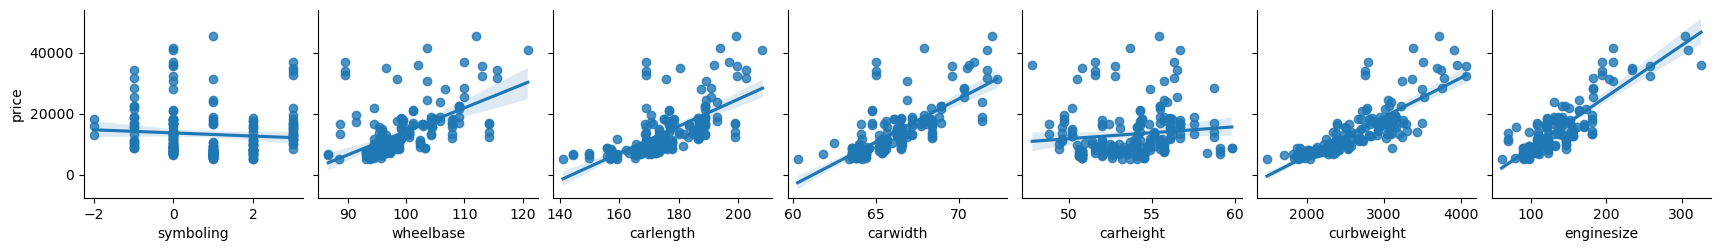

In [27]:
#Check visual for linear relationships
sns.pairplot(data = df, y_vars = 'price', kind = 'reg', x_vars = num_cols[:7]);

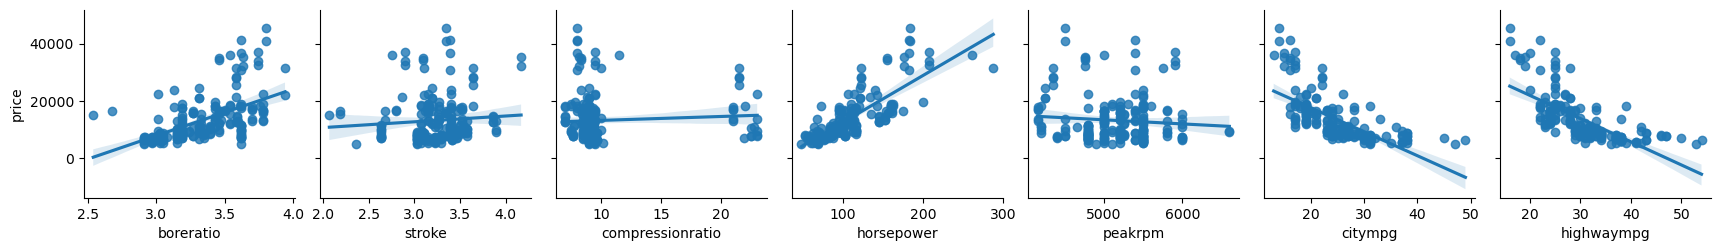

In [28]:
#Check visual for linear relationships
sns.pairplot(data = df, y_vars = 'price', kind = 'reg', x_vars = num_cols[7:]);

- This assumption is passed by most features. The features I would probably exclude would be stroke, compressionratio, carheight, and peakrpm.

In [29]:
#Drop non-linear columns
df = df.drop(columns = ['stroke', 'compressionratio', 'carheight', 'peakrpm'])

### Feature Independence

/var/folders/5v/9gj8mfq115g1d799797d3z5m0000gp/T/ipykernel_32003/3204630202.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


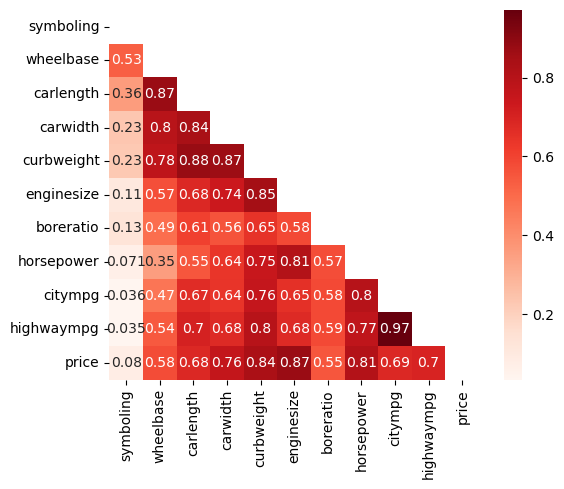

In [30]:
#Create heatmap with absolute values of correlations
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, square=True, cmap='Reds', annot=True, mask=mask);

- This assumption is violated by a lot of columns having a greater than 0.8 correlation with each other. The columns I will drop will be: citympg, wheelbase, carlength, carwidth, curbweight, and horsepower. 

In [31]:
#Drop highly correlated columns
df = df.drop(columns = ['citympg', 'wheelbase', 'carlength', 'carwidth', 'horsepower', 'curbweight'])

/var/folders/5v/9gj8mfq115g1d799797d3z5m0000gp/T/ipykernel_32003/4113936909.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


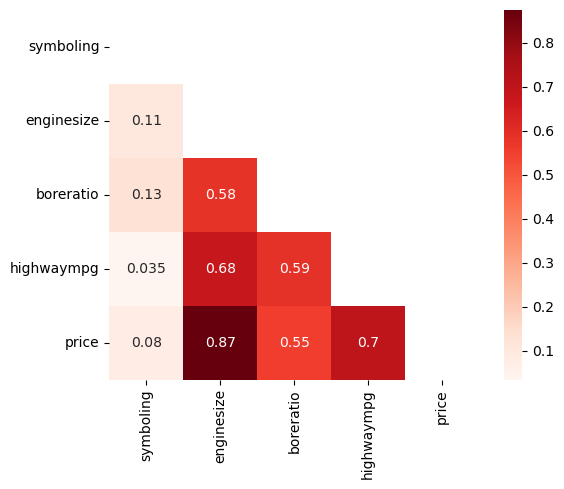

In [32]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, square=True, cmap='Reds', annot=True, mask=mask);

### Normality and Homoscedasticity

In [33]:
#Define X and y
y = df['price']
X = df.drop(columns = 'price')

In [34]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,highwaympg
90,1,diesel,std,two,sedan,fwd,front,ohc,four,103,idi,2.99,50
173,-1,gas,std,four,sedan,fwd,front,ohc,four,122,mpfi,3.31,34
93,1,gas,std,four,wagon,fwd,front,ohc,four,97,2bbl,3.15,37
5,2,gas,std,two,sedan,fwd,front,ohc,five,136,mpfi,3.19,25
167,2,gas,std,two,hardtop,rwd,front,ohc,four,146,mpfi,3.62,30


In [35]:
#Make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [36]:
#Make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['symboling', 'enginesize', 'boreratio', 'highwaympg']

In [37]:
#Make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse_output=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

In [38]:
#Fit the column transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['fueltype', 'aspiration', 'doornumber',
                                  'carbody', 'drivewheel', 'enginelocation',
                                  'enginetype', 'cylindernumber',
                                  'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['symboling', 'enginesize', 'boreratio',
                                  'highwaympg'])])

In [39]:
#Create the empty list
final_features = []

In [40]:
## B) Using list-slicing to find the encoder 
ohe_step = preprocessor.named_transformers_['pipeline-1'][-1]

In [41]:
## Now, get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype=object)

In [42]:
## Add the categorical feature names to our final_features list
final_features.extend(cat_features)
final_features

['fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginelocation_rear',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

In [43]:
## adding the numeric features which were passed through the model
final_features.extend(num_cols)
final_features

['fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginelocation_rear',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'symboling',
 'enginesize',
 'boreratio',
 'highwaympg']

In [44]:
#Transform training data
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling,enginesize,boreratio,highwaympg
90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,103.0,2.99,50.0
173,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,122.0,3.31,34.0
93,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,97.0,3.15,37.0
5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,136.0,3.19,25.0
167,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,146.0,3.62,30.0


In [45]:
#Transform testing data
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling,enginesize,boreratio,highwaympg
15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,209.0,3.62,22.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,131.0,3.13,22.0
100,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,3.33,34.0
132,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,121.0,3.54,28.0
68,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,183.0,3.58,25.0


In [46]:
#Overwrite df's with constant
X_train_df = sm.add_constant(X_train_df,has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df,has_constant='add', prepend=False)
display(X_train_df.head(2), X_test_df.head(2))

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling,enginesize,boreratio,highwaympg,const
90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,103.0,2.99,50.0,1.0
173,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-1.0,122.0,3.31,34.0,1.0


,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling,enginesize,boreratio,highwaympg,const
15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,209.0,3.62,22.0,1.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,131.0,3.13,22.0,1.0


In [47]:
#Make & fit a statmsodels OLS
model = sm.OLS(y_train,X_train_df, hasconst=True)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     49.07
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.20e-54
Time:                        13:56:50   Log-Likelihood:                -1396.1
No. Observations:                 153   AIC:                             2852.
Df Residuals:                     123   BIC:                             2943.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fueltype_diesel        1489.0317    759.362      1.961      0.052     -14.079    2992.142
fueltype_gas           2073.8607    866.959      2.392      0.018     357.768    3789.953
aspiration_std          348.6345    847.819      0.411      0.682   -1329.571    2026.840
aspiration_turbo       3214.2580    754.740      4.259      0.000    1720.297    4708.219
doornumber_four        2322.4219    822.866      2.822      0.006     693.608    3951.236
doornumber_two         1240.4706    772.351      1.606      0.111    -288.352    2769.293
carbody_convertible    2247.2920   1034.812      2.172      0.032     198.946    4295.638
carbody_hardtop       -2237.7398   1280.901     -1.747      0.083   -4773.204     297.724
carbody_hatchback      1183.1266    651.936      1.815      0.072    -107.341    2473.594
carbody_sedan          1755.9824    658.816      2.665      0.009     451.897    3060.068
carbody_wagon           614.2312    838.132      0.733      0.465   -1044.800    2273.262
drivewheel_4wd          567.6979   1015.397      0.559      0.577   -1442.218    2577.614
drivewheel_fwd          460.0030    710.359      0.648      0.518    -946.109    1866.115
drivewheel_rwd         2535.1915    930.427      2.725      0.007     693.468    4376.916
enginelocation_front  -4753.0712   1315.791     -3.612      0.000   -7357.599   -2148.543
enginelocation_rear    8315.9637   1511.913      5.500      0.000    5323.225    1.13e+04
enginetype_dohc        1041.2925   1105.750      0.942      0.348   -1147.472    3230.057
enginetype_dohcv      -1764.2890   3095.753     -0.570      0.570   -7892.143    4363.565
enginetype_l            819.3461   1333.175      0.615      0.540   -1819.592    3458.284
enginetype_ohc         2598.0377    935.378      2.778      0.006     746.514    4449.562
enginetype_ohcf        1759.2844   1410.874      1.247      0.215   -1033.454    4552.023
enginetype_ohcv       -3361.4769   1127.712     -2.981      0.003   -5593.713   -1129.240
enginetype_rotor       2470.6977   1465.671      1.686      0.094    -430.507    5371.903
cylindernumber_eight   9343.0181   1827.450      5.113      0.000    5725.692     1.3e+04
cylindernumber_five    -198.2537   1631.447     -0.122      0.903   -3427.603    3031.096
cylindernumber_four   -3911.7191   1923.676     -2.033      0.044   -7719.519    -103.920
cylindernumber_six    -2164.4119    909.135     -2.381      0.019   -3963.990    -364.834
cylindernumber_twelve -1976.4386   3427.729     -0.577      0.565   -8761.419    4808.541
cylindernumber_two     2470.6977   1465.671      1.686      0.094    -430.507    5371.903
fuelsystem_1bbl        1228.9634   1023.036      1.201      0.232    -796.073    3254.000
fuelsystem_2bbl         787.9980    843.522      0.934      0.352    -881.703    2457.699
fuelsystem_4bbl        

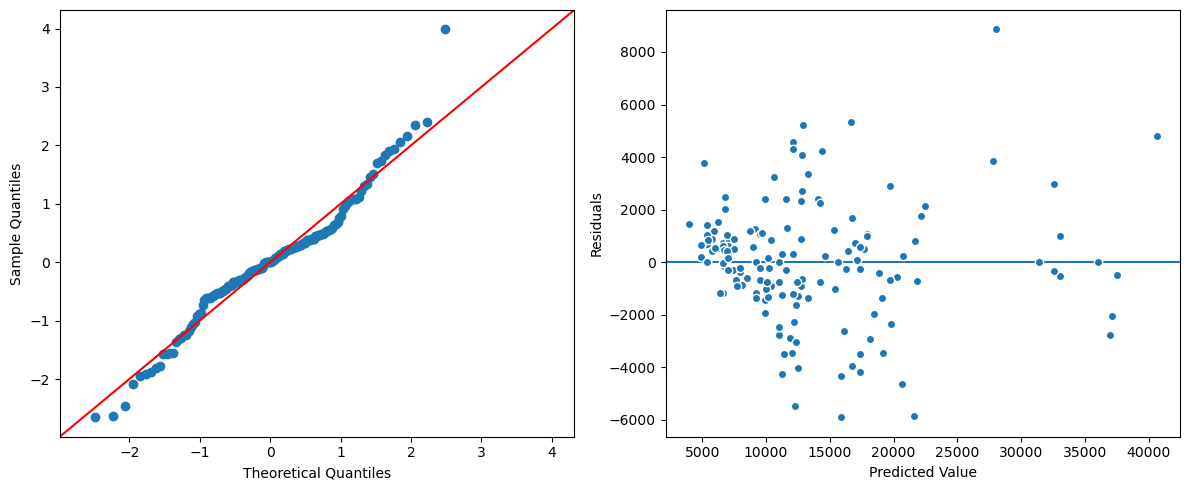

In [48]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

- This model also violates the normality and homoscedasticity assumptions. Looking at the two residual plots, we see that while the residuals largely follow the diagonal line, there is a high outlier that breaks the normality assumption. In the second plot, we see a slight cone shape in the residuals that violates the homoscedasticity assumption.

## Re-Run Model

In [49]:
scaler = StandardScaler()
z_price = scaler.fit_transform(y_train.values.reshape(-1,1))
z_price

array([[-0.7956461 ],
       [-0.56095133],
       [-0.76391344],
       [ 0.23896561],
       [-0.62428972],
       [-0.19323324],
       [ 3.00326125],
       [-1.01269751],
       [-0.5247761 ],
       [ 0.48635344],
       [-0.26901084],
       [ 0.39800971],
       [-0.3388227 ],
       [-0.82661718],
       [ 0.96500891],
       [-0.77076769],
       [ 1.09803223],
       [-0.38362922],
       [-0.81608193],
       [ 0.60706449],
       [-0.73167305],
       [-0.92308447],
       [ 0.4223804 ],
       [-0.48606225],
       [-0.05360953],
       [-0.07658398],
       [-0.85022628],
       [-0.6867396 ],
       [-0.73091147],
       [ 0.66672189],
       [ 0.44141999],
       [ 0.60706449],
       [ 0.39762892],
       [-0.91115299],
       [-0.29439697],
       [-0.73091147],
       [ 2.62246931],
       [-0.80960847],
       [-1.04709571],
       [-0.77076769],
       [ 0.47061404],
       [-0.35189655],
       [-0.88729003],
       [ 0.27196758],
       [ 0.06062805],
       [-0

In [50]:
z_price = pd.Series(z_price.flatten(),index=y_train.index )
z_price

90    -0.795646
173   -0.560951
93    -0.763913
5      0.238966
167   -0.624290
         ...   
106    0.638670
14     1.421325
92    -0.827379
179    0.333910
102    0.130948
Length: 153, dtype: float64

In [51]:
## saving the true/false result as our outlier index
idx_outliers= z_price>3
idx_outliers

90     False
173    False
93     False
5      False
167    False
       ...  
106    False
14     False
92     False
179    False
102    False
Length: 153, dtype: bool

In [52]:
## How many outliers did we find?
idx_outliers.sum()

2

In [53]:
## saving a cleaned version of y_train and X_train with outliers removed
y_train_cln = y_train[~idx_outliers]
X_train_cln = X_train_df[~idx_outliers]

In [54]:
print(f"Our model includes cars priced:")
print(f"- Greater than ${y_train_cln.min():,.2f}")
print(f"- Less than ${y_train_cln.max():,.2f}")

Our model includes cars priced:
- Greater than $5,118.00
- Less than $36,880.00


In [55]:
# Getting scaled y_test
z_price_test = scaler.transform(y_test.values.reshape(-1,1))
z_price_test = pd.Series(z_price_test.flatten(),index=y_test.index )
# saving the true/false result as our outlier index
idx_outliers_test= z_price_test>3
# how many outleirs in test data?
idx_outliers_test.sum()

2

In [58]:
## make clean version of X_test and y_test
X_test_cln = X_test_df[~idx_outliers_test] 
y_test_cln = y_test[~idx_outliers_test]

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     42.77
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.63e-50
Time:                        14:06:44   Log-Likelihood:                -1373.3
No. Observations:                 151   AIC:                             2807.
Df Residuals:                     121   BIC:                             2897.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fueltype_diesel        1642.45

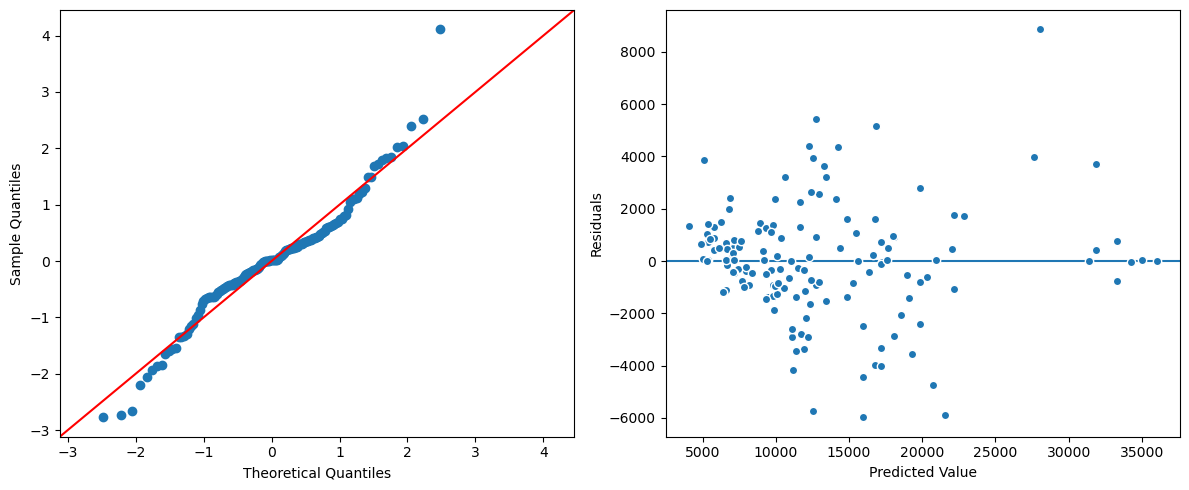

In [59]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train_cln,X_train_cln)
result = model.fit()
print(result.summary())
evaluate_ols(result,X_train_cln,y_train_cln)

In [60]:
## Use the result (not the model) to .predict
test_preds = result.predict(X_test_cln)

In [61]:
test_r2 = r2_score(y_test_cln, test_preds)
test_mse = mean_squared_error(y_test_cln, test_preds)

In [62]:
print(f'The testing r-square value is {test_r2:.2f} and the testing mean squared error is {test_mse:.2f}.')

The testing r-square value is 0.81 and the testing mean squared error is 7095772.19.
